<h1> W203 Statistics for Data Science </h1>

<h3> HW week 11 </h3>

### W203 Statistics for Data Science 


#### Author: "Aditya Mengani"
#### Submission Date : July 19, 2020


## Regression analysis of YouTube dataset

YouTube is the most popular free video-sharing website today. Use a linear regression framework to analyze how the number of views is affected by video quality and video lenght. 

**Dataset**

 - videos.txt (contains data about more than 9,000 videos)

**Dependent Variables**

- views 

**Regressors**

- rate (a proxy for video quality)

- length

### **(a)** Perform a brief exploratory data analysis on data to discover patterns, outliers, or wrong data entries and summarize your findings.


In [10]:
#import the dataset
my_data <- read.delim("videos.txt")
str(my_data)
head((my_data))

'data.frame':	9618 obs. of  9 variables:
 $ video_id: Factor w/ 9490 levels "#NAME?","-0Zkx9Sh6DU",..: 1467 7238 5358 711 2294 4780 3080 9483 3180 7501 ...
 $ uploader: Factor w/ 7254 levels "","000mdc000",..: 282 5389 6623 3004 849 6344 5938 4349 3284 4718 ...
 $ age     : int  1131 1236 1243 1237 1252 1236 1053 1240 1237 1187 ...
 $ category: Factor w/ 17 levels ""," UNA ","Autos & Vehicles",..: 4 10 6 6 4 6 4 6 10 9 ...
 $ length  : int  126 243 105 278 26 252 162 37 166 139 ...
 $ views   : int  204 1652 898 928 392 318 749 10 115 617 ...
 $ rate    : num  3 3.91 4.48 5 1.5 5 3 0 2 4.67 ...
 $ ratings : int  2 11 81 24 8 2 6 0 1 24 ...
 $ comments: int  1 4 36 13 17 3 6 0 0 17 ...


video_id,uploader,age,category,length,views,rate,ratings,comments
9QR1tni70fo,BHJJYP,1131,Comedy,126,204,3.00,2,1
l1DCSqAJ740,musicalrox,1236,Music,243,1652,3.91,11,4
ZES_o3XYGjM,tessaceleste,1243,Entertainment,105,898,4.48,81,36
4I8b40cViDE,booloveswondergirls,1237,Entertainment,278,928,5.00,24,13
Elp6Bf0HJIM,Fizz101Productionz,1252,Comedy,26,392,1.50,8,17
VPuKu7aU9GY,slytherin66,1236,Entertainment,252,318,5.00,2,3


In [11]:
# Blank value check for video_id
video_id = my_data$video_id
(which(is.na(video_id)))

integer(0)

There are no null values for videos

In [12]:
# Blank values check for uploader
uploader = my_data$uploader
(which(is.na(uploader)))

integer(0)

There are no null values for videos

[1] "The summary of age is"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0     920    1115    1045    1226    1258       9 

The blank values of age are 
 78 399 697 1141 1150 1241 1426 5318 8559

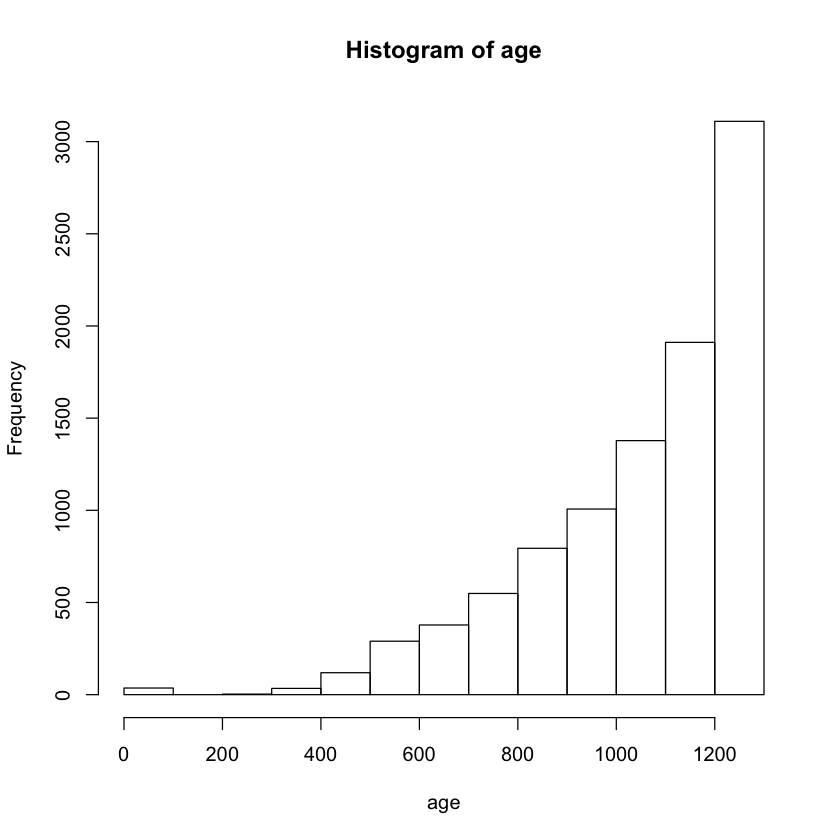

In [13]:
# Age variable
age = my_data$age
paste("The summary of age is")
summary(age)
cat("The blank values of age are \n",(which(is.na(age))))

par(mfrow = c(1,1))
hist(age)

The highest age for the videos is 1258

In [14]:
# Category variable
category = my_data$category
paste("The summary of category are")
summary(category)

[1] "The summary of category are"

UNA       Autos & Vehicles 
                    9                    36                   100 
               Comedy             Education         Entertainment 
                  621                   142                  2240 
     Film & Animation                Gaming         Howto & Style 
                  810                    96                   426 
                Music       News & Politics Nonprofits & Activism 
                 2676                   364                    33 
       People & Blogs        Pets & Animals  Science & Technology 
                  811                   251                   225 
               Sports       Travel & Events 
                  568                   210

There are no blank values for category

[1] "The summary of length are"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1      83     193     227     299    5289       9 


The blank values of length are
 78 399 697 1141 1150 1241 1426 5318 8559

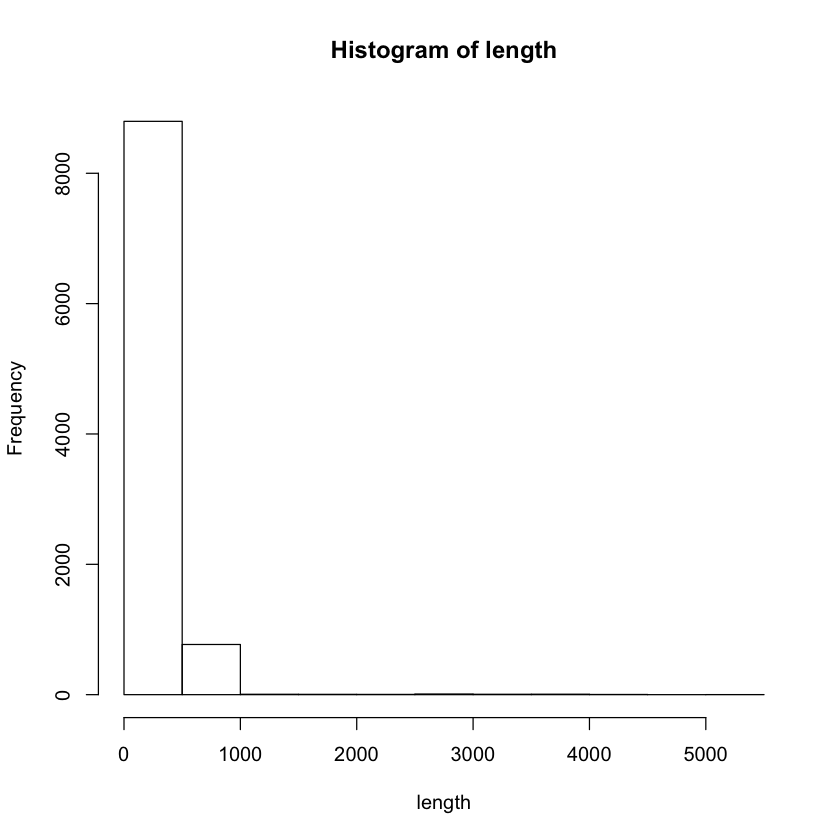

In [15]:
# Length variable
paste("The summary of length are")
summary(my_data$length)
cat("\nThe blank values of length are\n",(which(is.na(my_data$length))))

length = my_data$length
par(mfrow = c(1,1))
hist(length)

The highest values of length are : 5289 for video eQc8F7pYjcY.

[1] "The summary of views are"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      3     348    1453    9346    6179 1807640       9 

The blank values of views are
 78 399 697 1141 1150 1241 1426 5318 8559

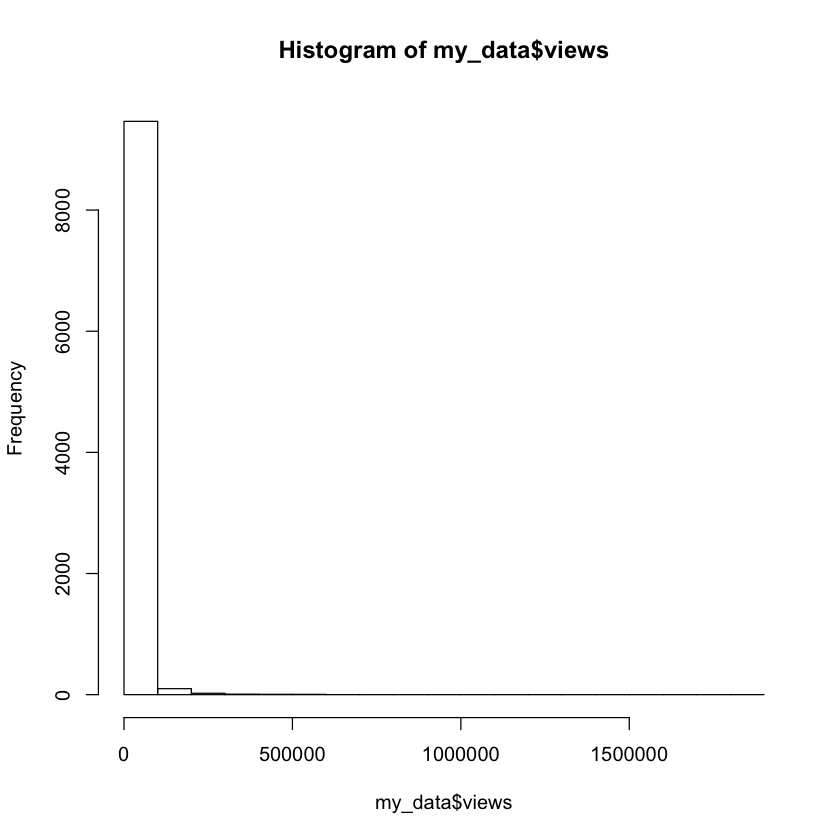

In [16]:
# Views variable
paste("The summary of views are")
summary(my_data$views)
cat("The blank values of views are\n",(which(is.na(my_data$views))))
par(mfrow = c(1,1))
hist(my_data$views)

The highest amount of views are for the video, q2lo5aQeDgw having
1807640 views.

In [17]:
# Rate variable
paste("The summary of rate are")
summary(my_data$rate)
cat("The blank values of rate are\n",(which(is.na(my_data$rate))))
par(mfrow = c(1,1))
hist(rate)

[1] "The summary of rate are"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   3.400   4.670   3.744   5.000   5.000       9 

The blank values of rate are
 78 399 697 1141 1150 1241 1426 5318 8559

ERROR: Error in hist(rate): object 'rate' not found


[1] "The summary of ratings are"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    1.00    5.00   20.66   15.00 3801.00       9 

The blank values of ratings are
 78 399 697 1141 1150 1241 1426 5318 8559

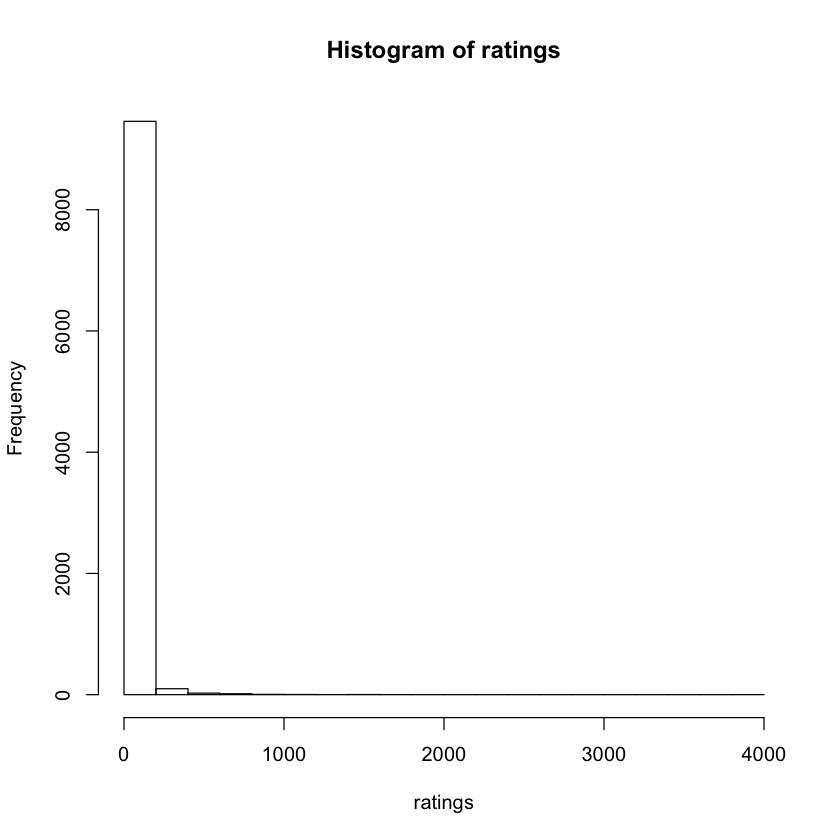

In [18]:
# Ratings variable
ratings = my_data$ratings
paste("The summary of ratings are")
summary(ratings)
cat("The blank values of ratings are\n",(which(is.na(ratings))))
par(mfrow = c(1,1))
hist(ratings)

The highest ratings are 3801 for video : q2lo5aQeDgw which also has the highest amount of views, 1807640 in comedy category.

[1] "The summary of comments are"

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   -2.00     1.00     3.00    19.99    13.00 13211.00        9 

The blank values of comments are
 78 399 697 1141 1150 1241 1426 5318 8559

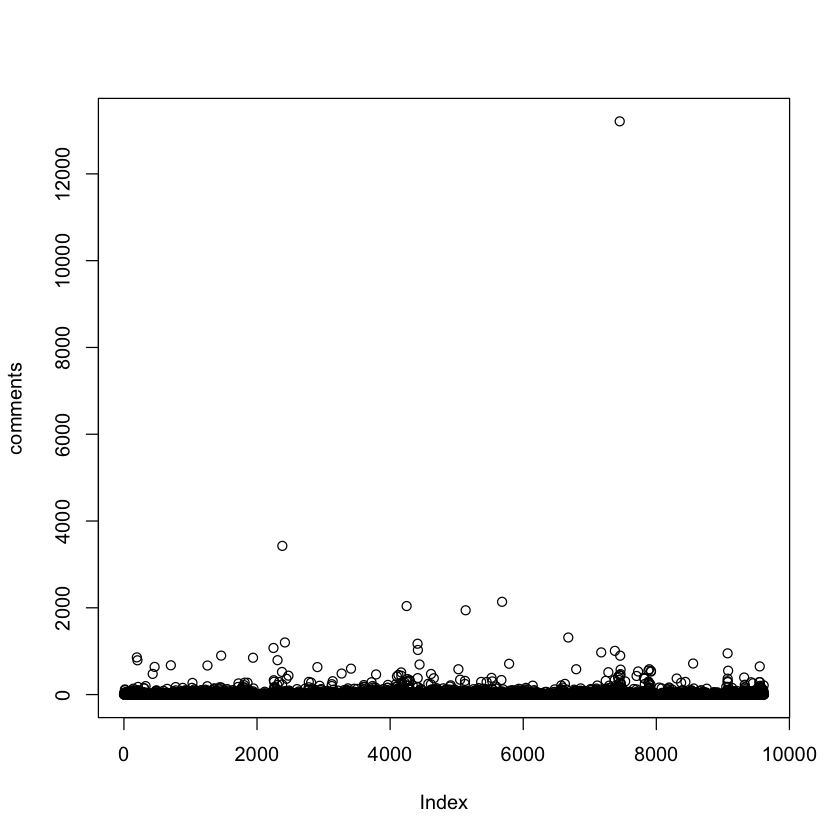

In [19]:
# Comments variable
comments = my_data$comments
paste("The summary of comments are")
summary(comments)
cat("The blank values of comments are\n",(which(is.na(comments))))

par(mfrow = c(1,1))
plot(comments)

Outlier : There is an outlier in the dataset for comments which represents a highest number of comments 13211

Note : The comments variable has a minimum value of -2 which is in-accurate and needs to be imputated.

#### Treatment of the missing values:

In [20]:
# Replace blank values for length
my_data$length[is.na(my_data$length)] = 0
length = my_data$length
paste("The summary of length after treatment are")
summary(length)

# Replace blank values for views
my_data$views[is.na(my_data$views)] = 0
views = my_data$views
paste("The summary of views  after treatment are")
summary(views)

# Replace blank values for rate
my_data$rate[is.na(my_data$rate)] = 0
rate = my_data$rate
paste("The summary of rate  after treatment are")
summary(rate)

# Replace blank values for ratings
my_data$ratings[is.na(my_data$ratings)] = 0
ratings = my_data$ratings
paste("The summary of ratings after treatment are")
summary(ratings)

# Replace blank values for comments
my_data$comments[is.na(my_data$comments)] = 0
comments = my_data$comments
paste("The summary of comments after treatment are")
summary(comments)

# Replace blank values for age
my_data$age[is.na(my_data$age)] = 0
age = my_data$age
paste("The summary of age after treatment are")
summary(age)

[1] "The summary of length after treatment are"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    82.0   193.0   226.8   299.0  5289.0 

[1] "The summary of views  after treatment are"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
      0.0     346.2    1448.5    9337.4    6173.2 1807640.0 

[1] "The summary of rate  after treatment are"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.390   4.670   3.741   5.000   5.000 

[1] "The summary of ratings after treatment are"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    5.00   20.64   15.00 3801.00 

[1] "The summary of comments after treatment are"

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   -2.00     1.00     3.00    19.97    13.00 13211.00 

[1] "The summary of age after treatment are"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     919    1115    1044    1226    1258 

corrplot 0.84 loaded


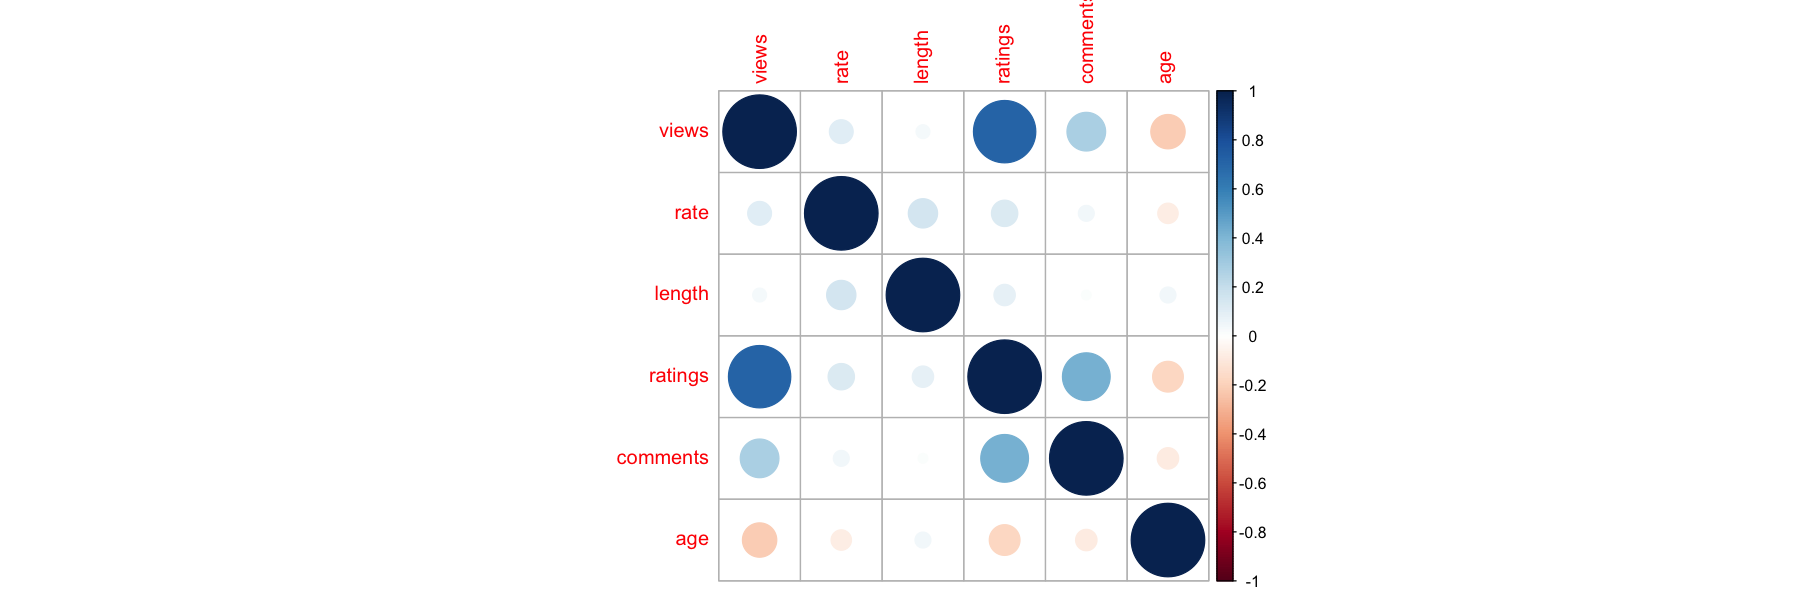

In [21]:
####### Examine Multicollinearity for variables ###############
# Using the below correlation plot to measure the correlation
# effect available between other variables available in data
options(repr.plot.width=15, repr.plot.height=5)
library(corrplot)
corrdat = my_data[,c("views", "rate", "length","ratings",
                    "comments","age")]
corrdat.cor = cor(corrdat, method = c("pearson"))
corrplot(corrdat.cor)

Summary : From the relationships in the correlation matrix we find that the variable views, has a strong positive correlation with
ratings, followed by mild +ve relationship with comments, and a little + ve relationships with rate and length, followed by a -ve correlation with respect to age.
The highest views(1807640) for a video q2lo5aQeDgw, also has highest
ratings (3801).

### **(b)** Estimate the following model to investigate the relationship between views and regressors further.

$$ f(views) = \beta_0 + \beta_1 g(rate)  + \beta_3 h(length)$$
*f(.), g(.), and h(.) any functional form such as log().*


Loading required package: carData


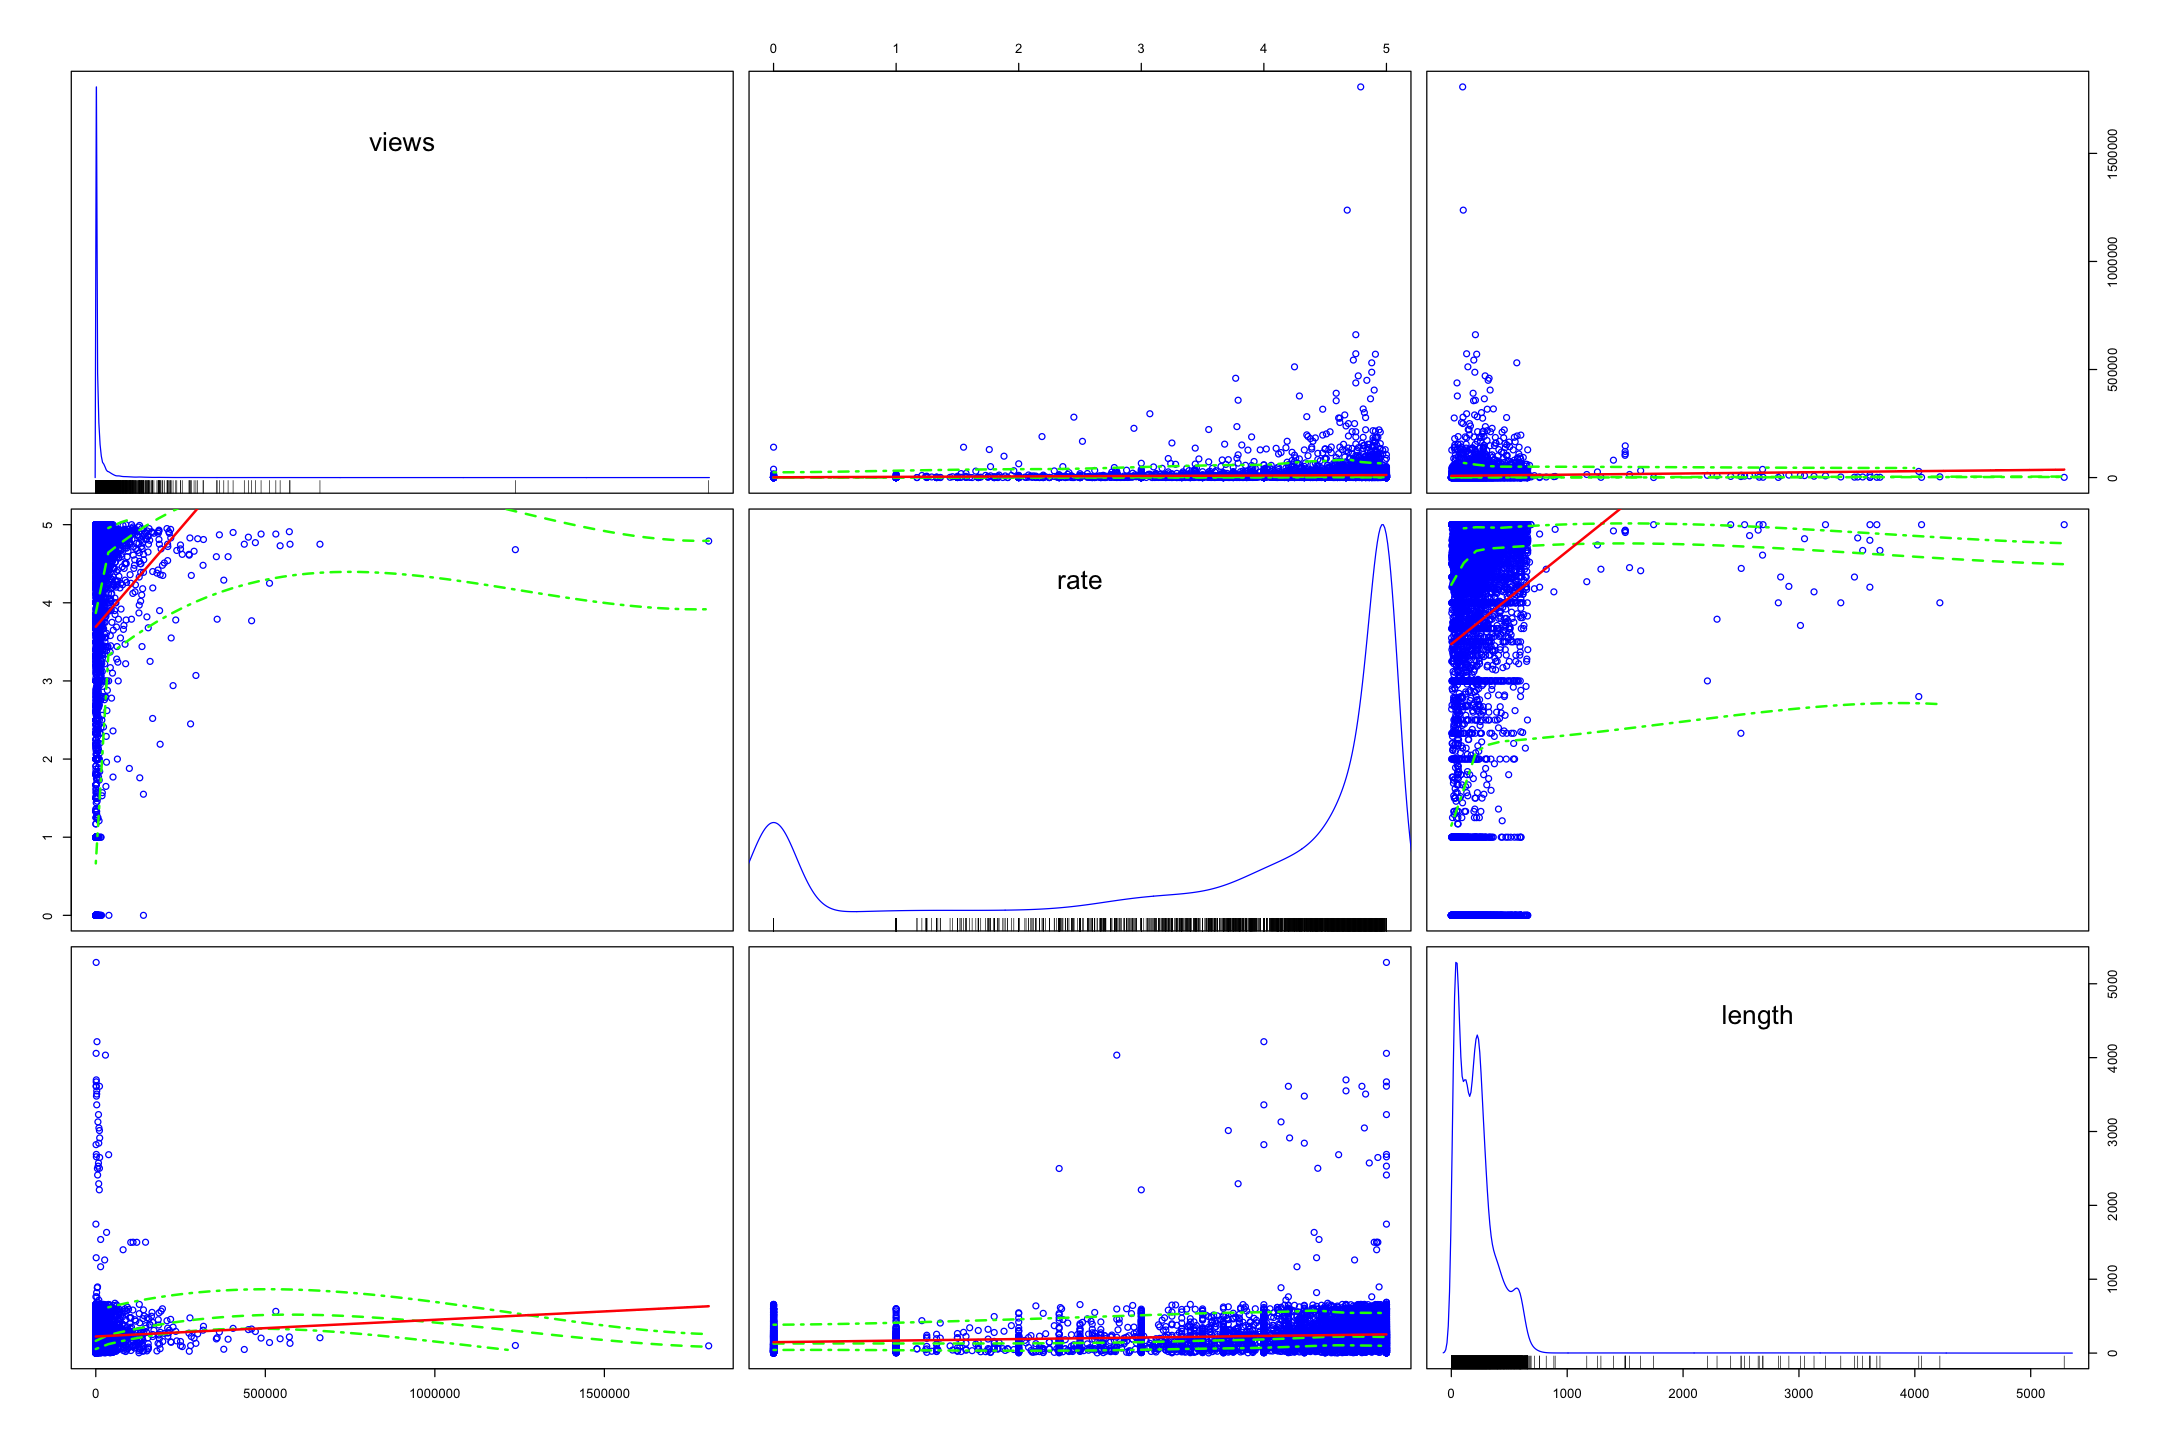

In [22]:
# Model 2 : scatterplot to represent the relationship between 
# views, rate and length
options(repr.plot.width=18, repr.plot.height=12)

library(car)
scatterplotMatrix(my_data[,c("views", "rate", "length")]
                 , regLine = list(col='red'),
                  smooth = list(col.smooth = 'green', 
                                col.spread='green'), cex.labels = 2)

Looking at the relationship between the three variables,
views have a +ve relationship with rate and length overall.
The histogram of views is right-skewed, whereas, rate is bi-modal in nature and length has a right-skew as well.

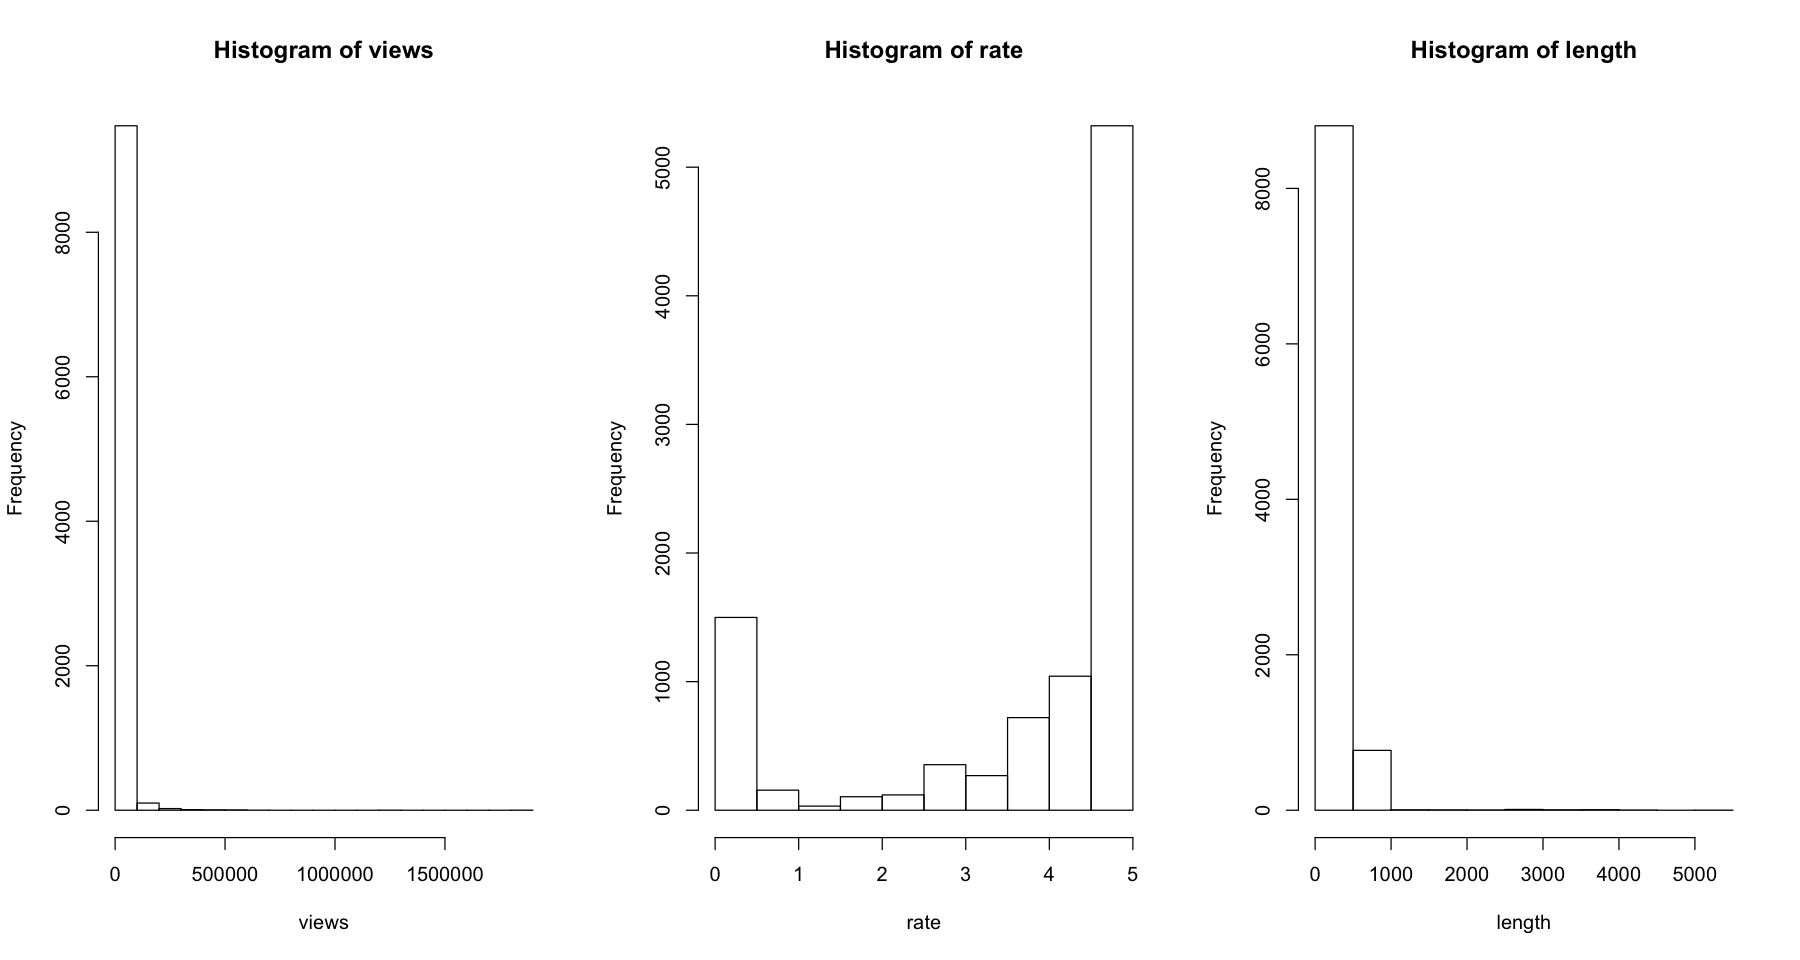

In [24]:
# Histograms of views, rate and length
par(mfrow=c(1,3), cex = 1)
options(repr.plot.width=15, repr.plot.height=8)

hist(views)
hist(rate)
hist(length)

By studying the histogram distribution, we can see that none of the three variables are normal.


Call:
lm(formula = views ~ rate)

Coefficients:
(Intercept)         rate  
       1228         2168  


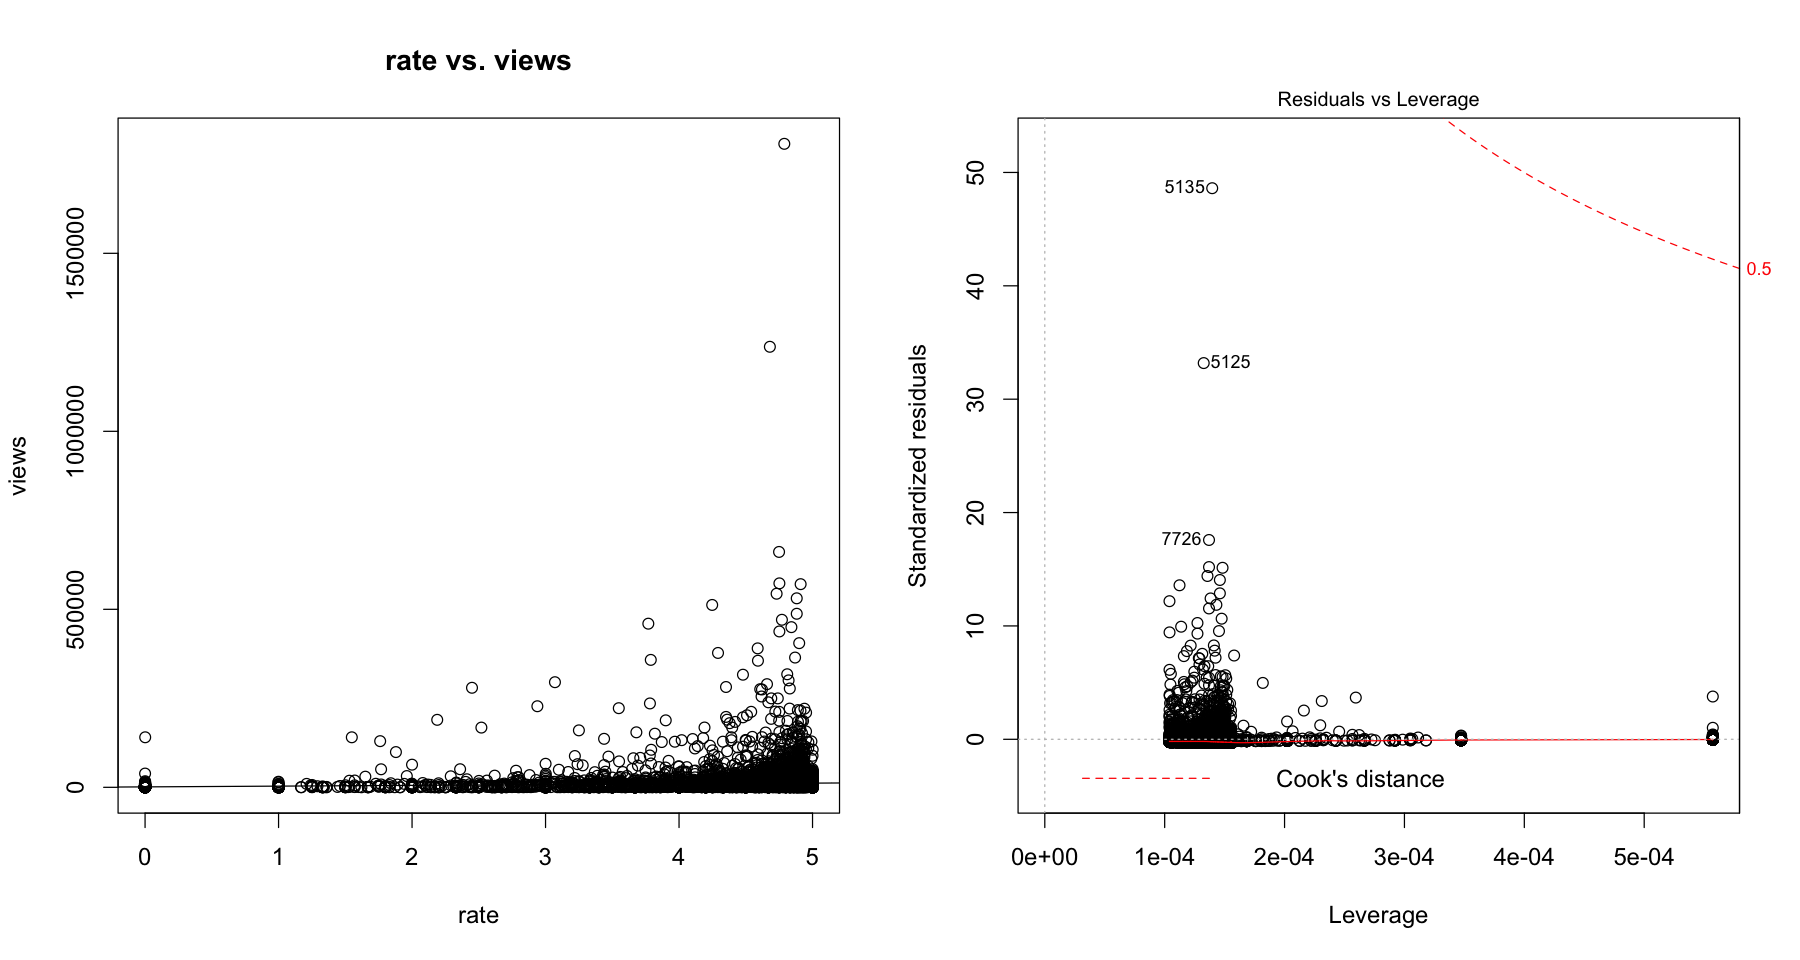

In [25]:
# Outlier analysis for rate and views
par(mfrow=c(1,2), cex = 1.2)
options(repr.plot.width=15, repr.plot.height=8)

plot(jitter(rate),jitter(views), main = 'rate vs. views', xlab = 'rate', ylab='views')
(m21= lm(views ~ rate))
abline(m21)

plot(m21, which = 5)

Looking at the 'rate vs views' plot there are few outliers,having
1million and 1.5+ million views videos which are having a rating
closer to 5. This is expected, that the most popular videos tend to have the highest ratings. 

From the cook's distance in the standardized residuals vs Leverage plot, we can see that none of the data falls under the cook's distance thus, changing any of the data values will not have significant effect on the linear regression effect of model.



Call:
lm(formula = views ~ length)

Coefficients:
(Intercept)       length  
   8090.697        5.498  


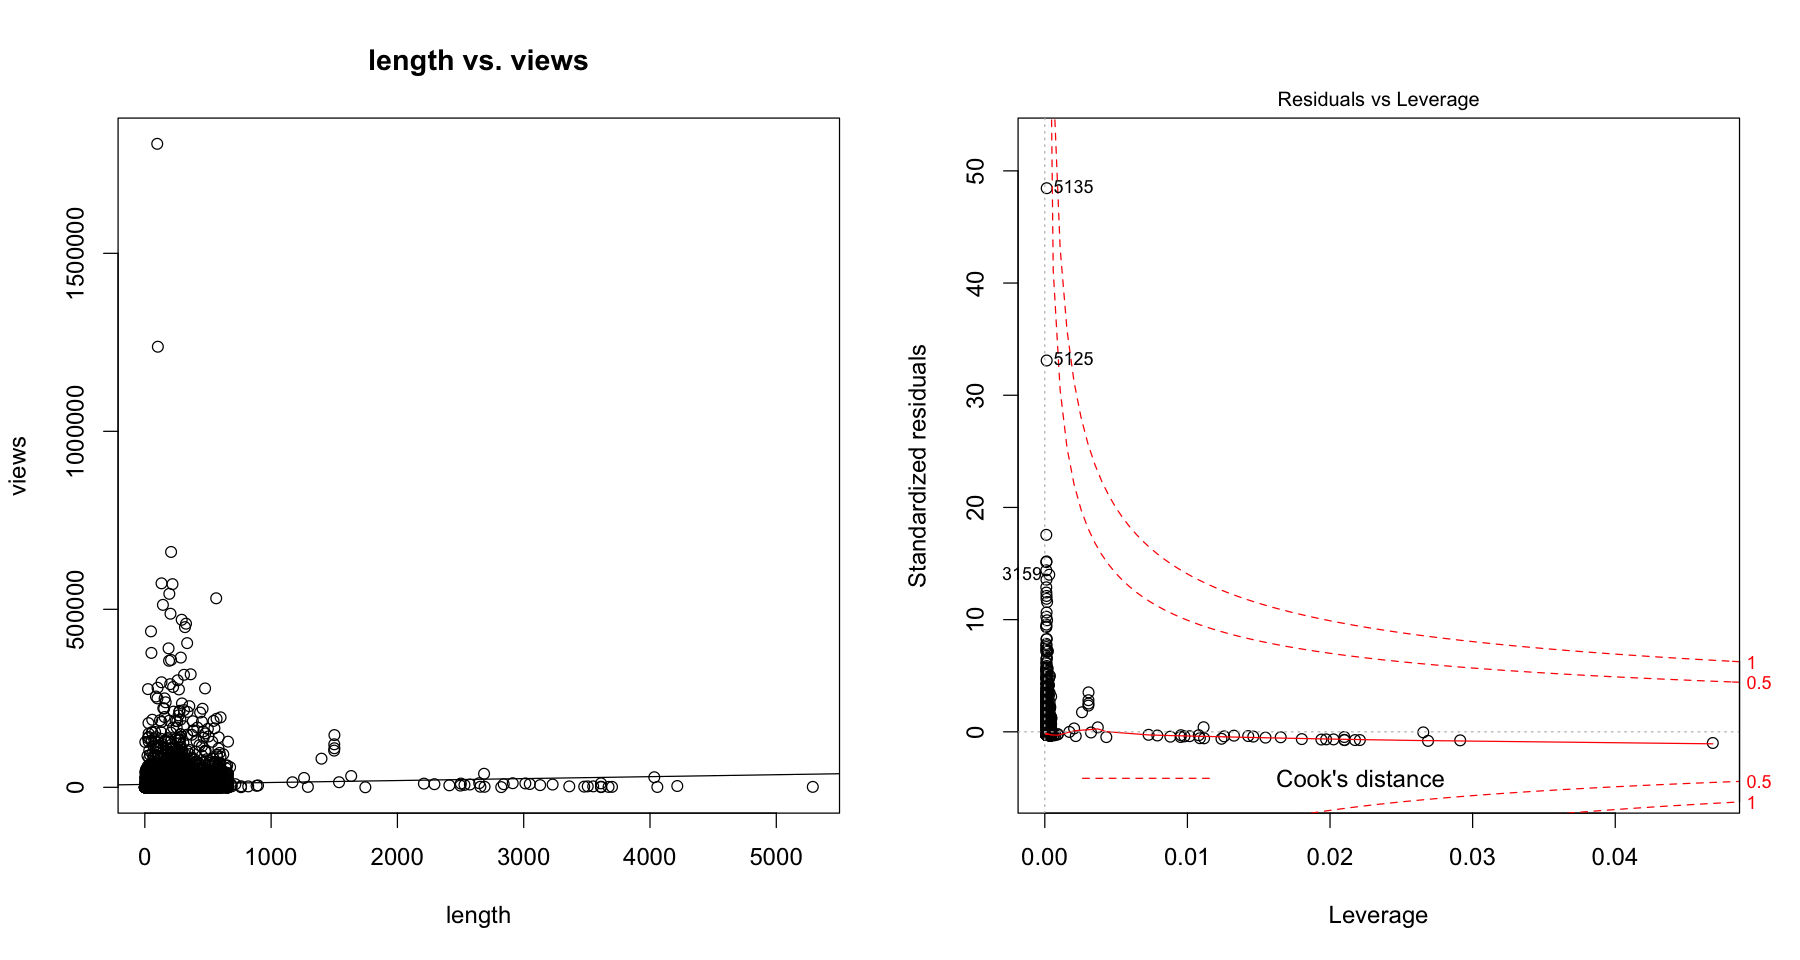

In [26]:
# Outlier analysis for length and views
par(mfrow=c(1,2), cex = 1.2)
options(repr.plot.width=15, repr.plot.height=8)

plot(jitter(length),jitter(views), main = 'length vs. views', xlab = 'length', ylab='views')
(m31= lm(views ~ length))
abline(m31)

plot(m31, which = 5)

Looking at the 'length vs views' plot there are few outliers,having 1 million and 1.5+ million views videos which are having a length < 1000 and a video having length 5000 having a low views. Looking at it
we can't really find a strong relationship between Length and views
overall and outliers tell that the longer the length the lesser the number of views for some very long videos, which might not be practically true.

From the cook's distance in the standardized residuals vs Leverage plot, we can see that none of the data falls under the cook's distance thus, changing any of the data values will not have significant effect on the linear regression effect of model, but should be strictly avoided as few outliers are very close to the cook's distance.

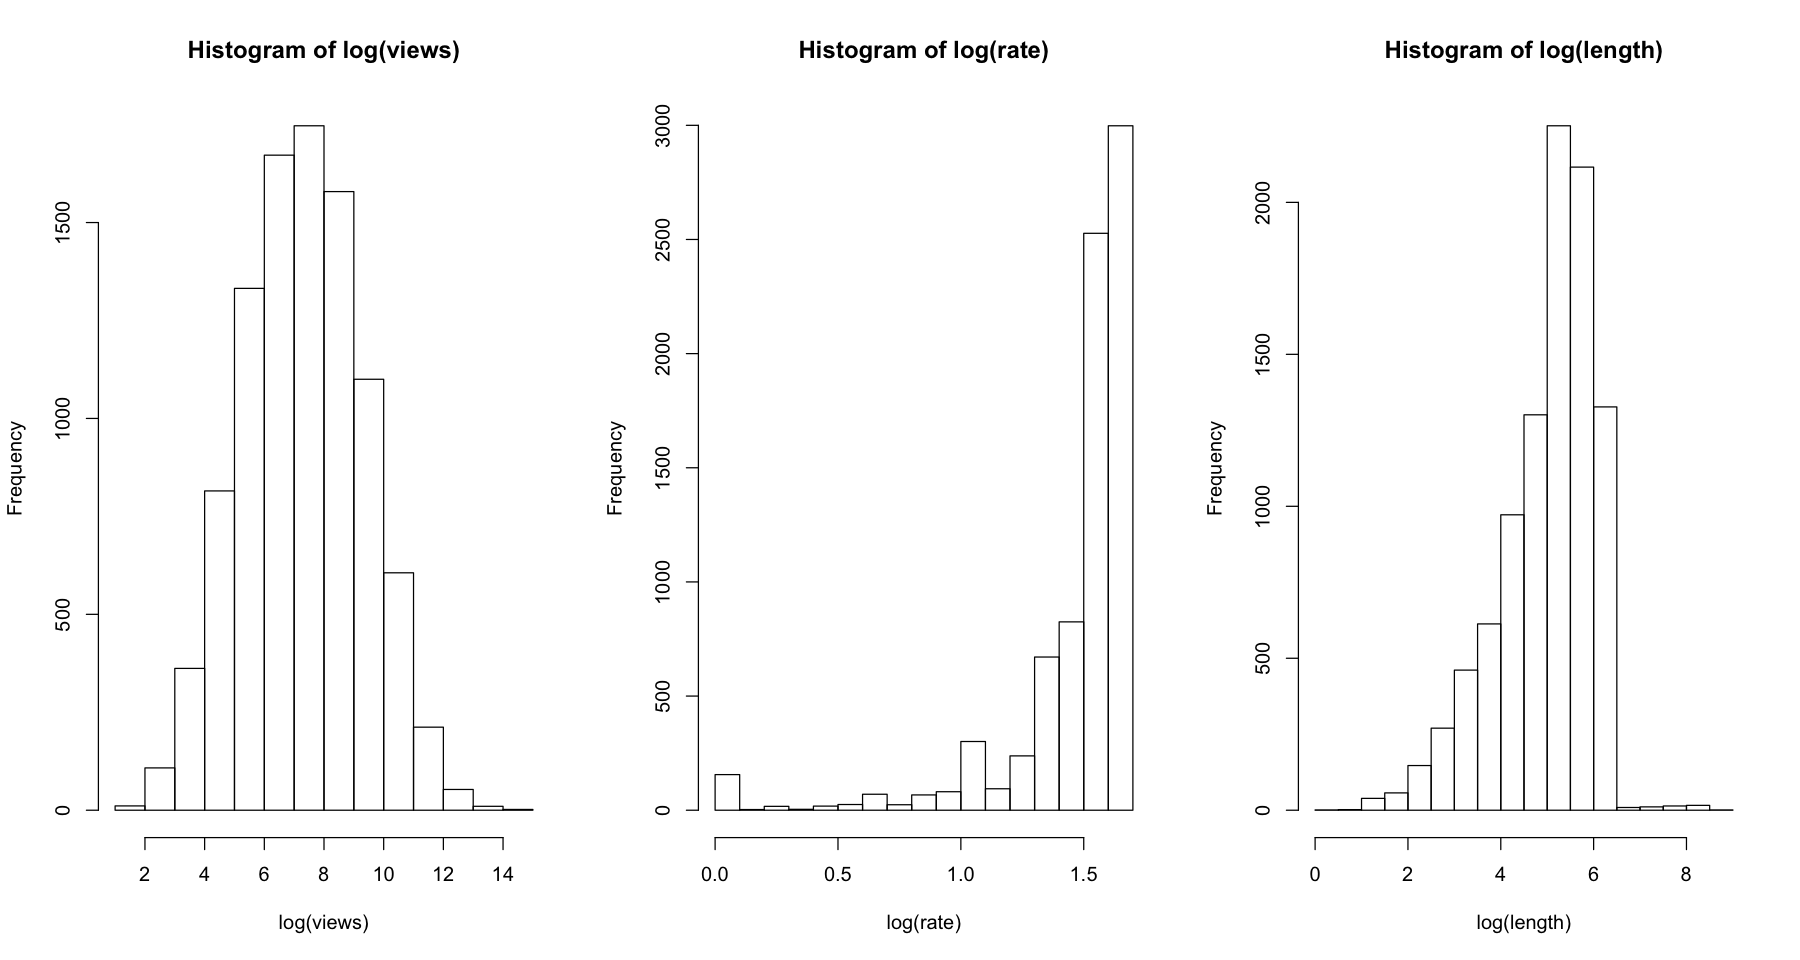

In [27]:
# Histogram plots of the log transformations of varaibles
par(mfrow=c(1,3), cex = 1)
options(repr.plot.width=15, repr.plot.height=8)

hist(log(views))
hist(log(rate))
hist(log(length))

We can observe that after applying log on the variables, the rate 
variable has reduced its bimodal nature to some extent, but
views and length have become relatively normal effect.

In [28]:
#Testing the base model and transformed model for R-squared value

# base model
(base = lm(views ~ rate + length))
cat("R-squared value for base:",summary(base)$r.squared)

# transformed model
(model1 = lm(log(views+1) ~ log(rate+1) + log(length+1)))
cat("R-squared value for transformed model1:",
    summary(model1)$r.squared)



Call:
lm(formula = views ~ rate + length)

Coefficients:
(Intercept)         rate       length  
    784.786     2104.699        2.998  


R-squared value for base: 0.01129215


Call:
lm(formula = log(views + 1) ~ log(rate + 1) + log(length + 1))

Coefficients:
    (Intercept)    log(rate + 1)  log(length + 1)  
         4.6747           1.3853           0.1298  


R-squared value for transformed model1: 0.2124357

From the above R-squared values, we can see that the base model
has a very small R-squared value making it insigificant in terms of 
effect where as the log transformed model gives a R-squared model
value of 0.21 which means it determines the effect of 21% of the
variance in the model. Hence, due to the stronger effect size, I choose to use the model1 which is transformed using log function on the variables in the model.

**(c)** Using diagnostic plots, background knowledge, and statistical tests, assess all six assumptions of the CLM. When an assumption is violated, state what response you will take.

- When you check zero conditional mean assumption, identify one omitted variable that is not within this dataset, and estimate whether they are biasing the effect you measure towards zero or away from zero.



In [29]:
# Summary of transformed model
model1


Call:
lm(formula = log(views + 1) ~ log(rate + 1) + log(length + 1))

Coefficients:
    (Intercept)    log(rate + 1)  log(length + 1)  
         4.6747           1.3853           0.1298  


#### 1) Linear in Parameters

The can be written as Total views ~ rate + length and translated to the following form:

$f(views) = \beta_0 + \beta_1g(rate) +\beta_2(length) + u$
where $\beta_0, \beta_1, \beta_2$ are the unknown parameters of interest and $u$ is an unobserved random error or disturbance term.

All the parameters are linear in relationship with no non-linear relationships.

We have not constrained our error in any way so there's nothing to test and the formula is true for some definition of $u$ which we can also define as

$u = $f(views) - $\beta_0 + \beta_1g(rate) +\beta_2(length)$

Thus linearity is met by definition in this model.

#### 2) Random Sampling

We have a random sample of  observations,${(x_{i1}, x_{i2},...,x_{ik}, y_i):i=1,2,...,n}$ following the population model in the linear in parameters assumption. This assumption says that all data points are independent random draws from our population distribution. 

We assume the data to have a random sampling, but with the limited information available it is difficult to determine if the data is
indeed sampled randomly. 

Random sampling can be violated if there is clustering when views are collected into groups and represent as a number of these groups or autocorrelation when the error for one data point is correlated with the error for the next data point. 
From the dataset, we are not sure if the datasets have some sort of
clustering and would need a test like Durbin Watson test to determine it.


In [30]:
#Durbin Watson test tests for autocorrelation

library(lmtest)
dwtest(model1)

# large p value so we reject the null that 
# states true autocorrelation is zero and 
# accept alternate hypothesis that autocorrelation exists

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




	Durbin-Watson test

data:  model1
DW = 1.1703, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


The null hypothesis for the Durbin-Watson test is that there is no autocorrelation and the test shows a very small p-value so we reject the null hypothesis and conclude that there is autocorrelation in the dataset thus failing the Random sampling assumption.
A probable reason for this is error from one datapoint is correlated to the error from next datapoint. So the sampling procedure was done on a cluster of videos which might belong to a particular genre or some similar category.

There is no easy way to fix this issue, as there are some special methods or models that leverage autocoorelation in the dataset which needs to be implemented to fix this issue.


#### 3) No Perfect Collinearity

Our model contains two unrelated variables (rate and length). From an intuitive point of view, these variables have no relationship. 
Since,no explanatory variables is a perfect linear combination of other explanatory variables so we don't need to drop any variable.
There is no relationship between ratings and length of vidoes and we can verify this using the vif function(variance inflation factor) which determines if there is multicollinearity between the independent variables.


In [31]:
# variance inflation factor
library(car)
vif(model1)
#value greater than 5 is problematic so okay here

log(rate + 1) log(length + 1) 
       1.062282        1.062282

This variance inflation factor measures how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF value greater than 5 indicates a problematic amount and we see the highest values are about 1 indicating that multicollinearity is not an issue.

#### 4) Zero Conditional Mean

The error u has an expected value of zero given any values of the explanatory variables. In other words, the value of the explanatory variables must contain no information about the mean of the unobserved factors. $E(u_i | x_{i1},x_{i2},...,x_{ik})$
This assumption enforces linearity.

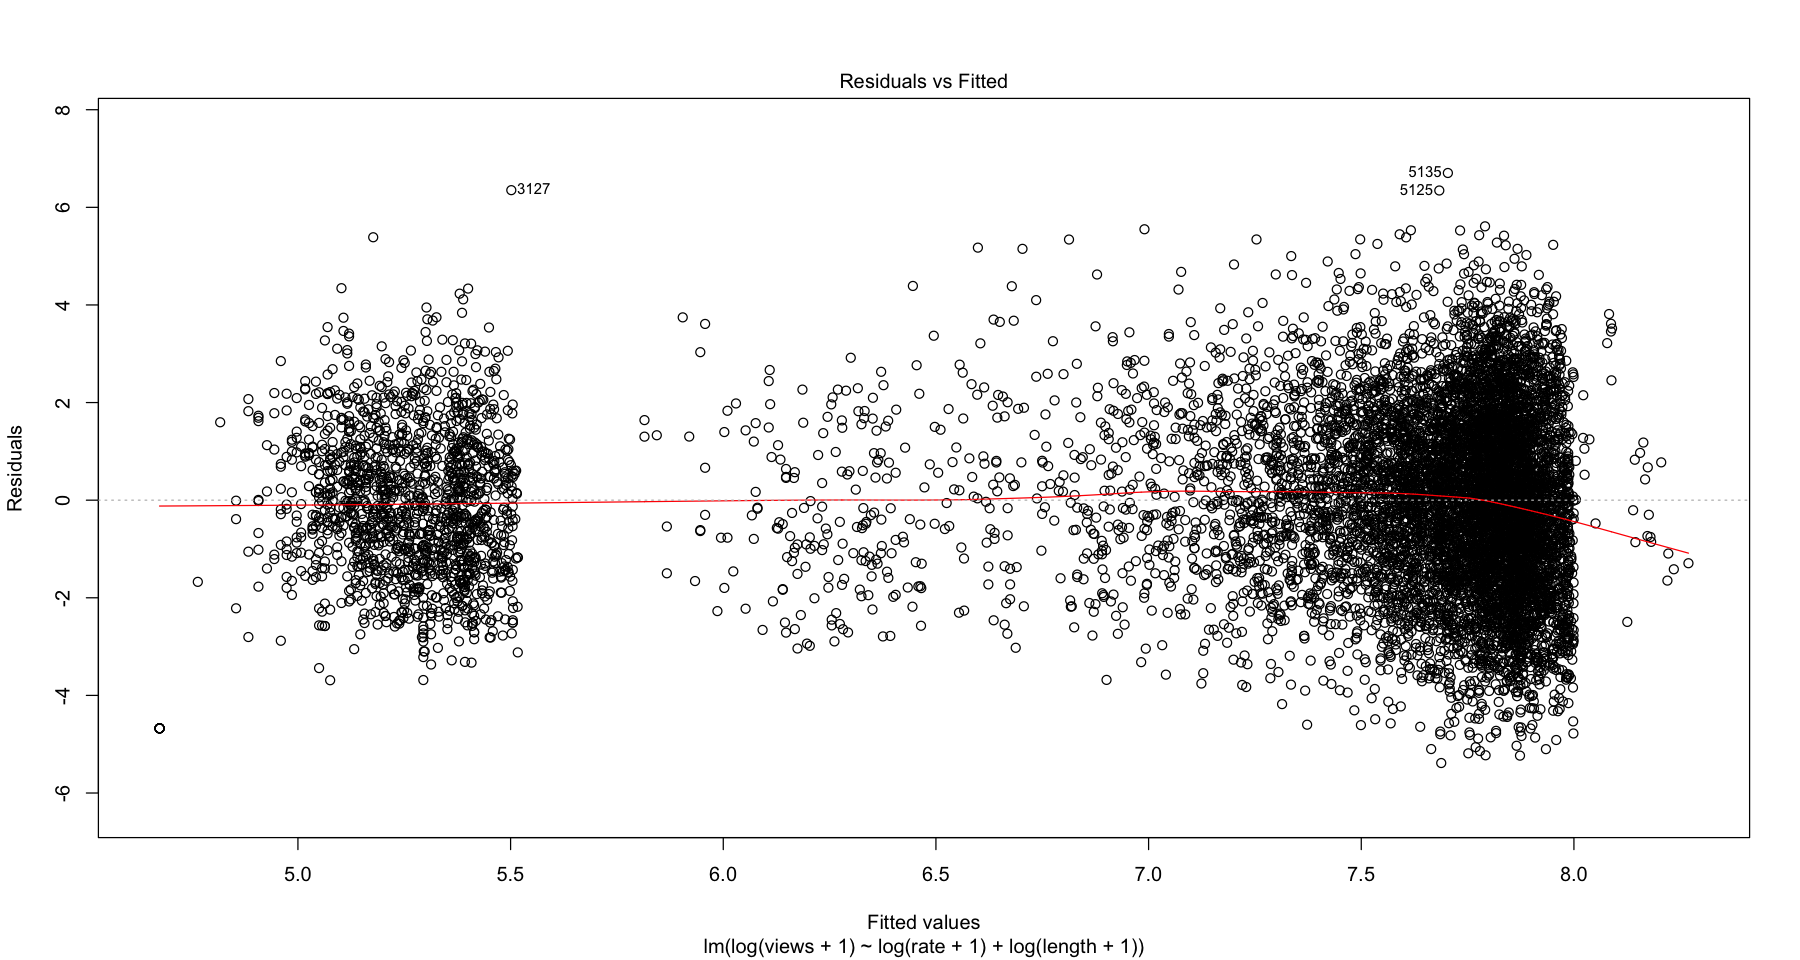

In [32]:
# residuals vs predictor plot
plot(model1,which=1)

To examine zero conditional mean, we are looking for if the mean of the residuals change from left to right which means we look at the red spline line and would expect it to be flat and at 0 if the assumption is met. Looking at the plot, we see the line flattens and is close to zero from left to right. This is an indication that thezero conditional mean is met.

#### 4.1) Exogeneity

Explanatory variables that are correlated with the error term are called endogenous. Endogeneity is a violation of zero-conditional mean and implies the OLS coefficients are biased and inconsistent and we want exogenous $Cov(x_j, u) = 0$ for all j coefficients

In [33]:
#for all 2 variables
paste("covariance of log(rate+1) : ")
cov(log(rate+1),model1$residuals)
paste("covariance of log(length+1) : ")
cov(log(length+1),model1$residuals)
# no zero conditional mean but exogenous

[1] "covariance of log(rate+1) : "

[1] -9.500866e-17

[1] "covariance of log(length+1) : "

[1] -7.391379e-17

From the above results, we see that all the variables have a very small covariance extremely close to 0 suggesting that exogenity is met

#### 5) Homoskedasticity

The error u has the same variance given any values of the explanatory variables $Var(u_i| x_1, x_2,...,x_k)=\sigma^2$
Explanatory variable values must contian no information about variability of the error
Looking at the fitted value plots for both the plots, the band showing the spread of variance has a generally uniform thickness.

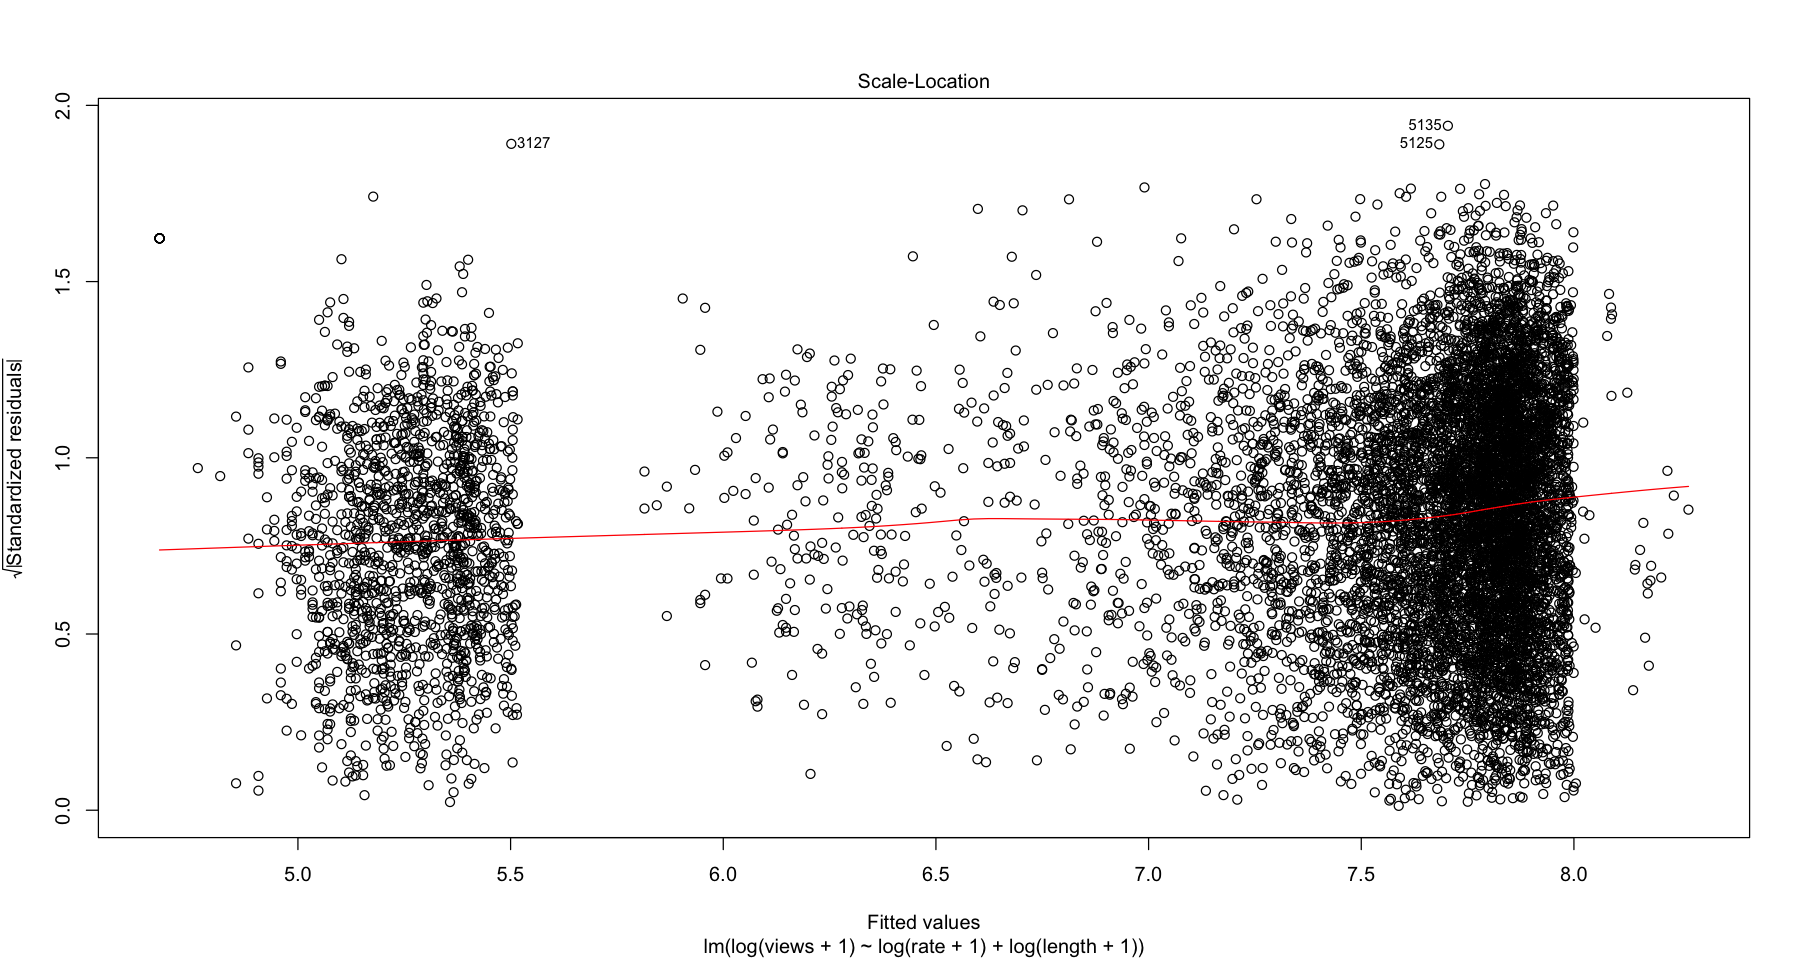

In [34]:
plot(model1,which=3)

It may be observerd that there seems to be some heteroskedasticity on the right side of the graph. Accounting for the noise, we may consider that homoskedasticity is met for the above graph since the square root of residuals are equally spread across the ranges of predictors and the band thickness across the x-axis for the residuals is almost constant for the fitted values. 


In [35]:
# Breusch-Pagan Test
library(lmtest)
bptest(model1)
#null hypothesis is that there is homoskedasticity 
#We fail to reject the null hypothesis 
# Warning: sample size effects the results, for large sample sizes
# for a few hundred data points or more, almost any amount 
# of heteroskedasticity will appear as a significant test


	studentized Breusch-Pagan test

data:  model1
BP = 109.88, df = 2, p-value < 2.2e-16


Finally we conclude that hemoskedasticity is met for the model even though Breusch-Pagan Test shows that there is some heteroskedasticity, as the model has a significantly large sample size of 9618 rows, which indicates that almost any amount of heteoskedasticity will appear as a significant result.

#### 6) Normality

The population error u is independent of the explanatory variables and is normally distributed with zero mean and variance
Add assumption about the shape of error distribution $u_i$ Assume errors are drawn from a normal distribution with mean 0 and that errors are independent of our explanatory variables so the distribution looks the same conditional on any values of the explanatory variables


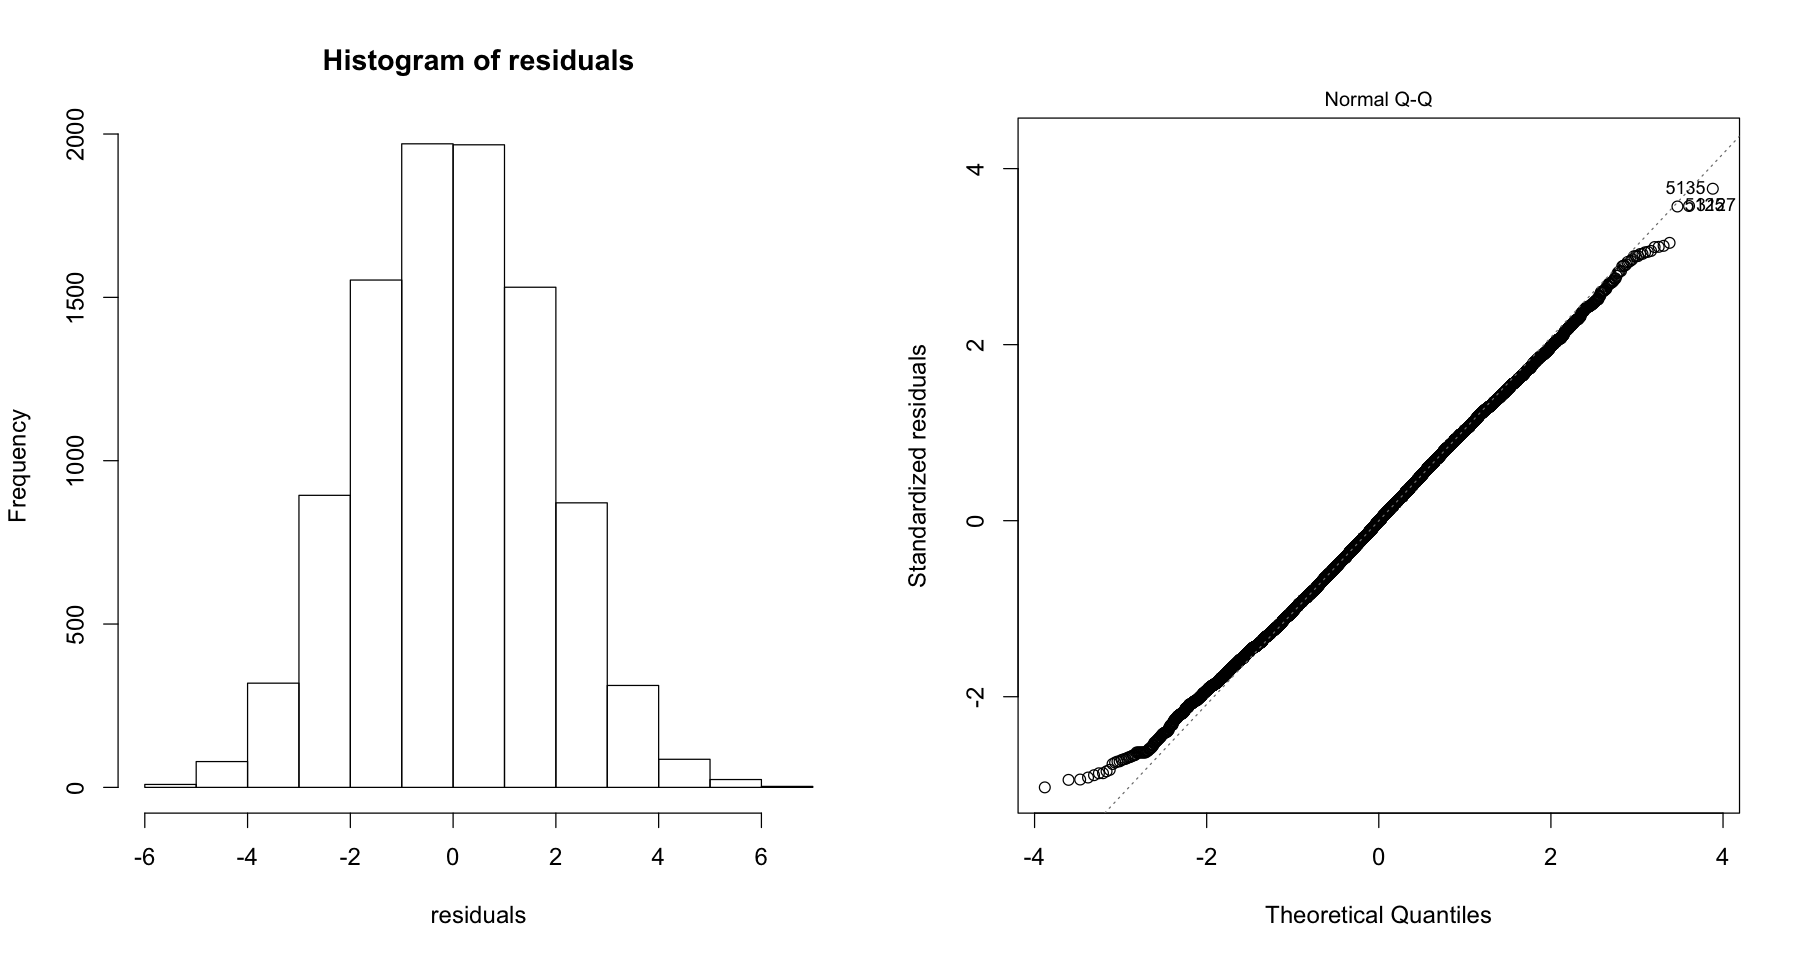

In [36]:
par(mfrow=c(1,2), cex = 1.2)

options(repr.plot.width=15, repr.plot.height=8)
hist(model1$residuals, main 
     = "Histogram of residuals", xlab = 'residuals')

#for each data point, the y coordinate is the standardized 
#residual (residual divided by the standard deviation 
#of the residuals) and the x-coord 

plot(model1, which = 2)


Looking at the above plot of the residuals for the model with the log-log transform, we see the residuals are clustered around a point above 0 from the histogram and the q-q plot represents a close to perfect normality having more normalized values with less deviations
suggesting the residuals are more normal.

#### omitted variable analysis : Shares of a video

Using the dataset provided with the problem, we do not have any data that represents the shares of a particular video. 

Assume a proxy variable for shares of a video, 
 no_of_shares = {Total number of shares for a video}

Original model :

Views = $\beta_0$ + $\beta_1$rate + $\beta_2$length +  $\mu$ 

Model including the omitted variable:

Views = $\beta_0$ + $\beta_1$rate + $\beta_2$length + $\beta_3$no_of_shares +  $\mu$

We can assume that shares is uncorrelated with length, since sharing a video is not dependent on links. Instead shares has some correlation with rate variable. Usually people who tend to rate a video also tend to share it or forward the video to their
peers or friends or in other groups.

Thus,
no_of_shares = $\alpha_0$ + $\alpha_1*$rate + $\mu$

For omitted variable bias to exist in the linear regression,
the omitted variable bias must be a determinant of dependent variable and must be correlated with an independent variable.

To estimate the likely bias on $\tilde{\beta_1}$, we can infer no_of_shares and rate have a positive relationship, based on the historical viewership in youtube, since more ratings tend to have more shares. We have also proven that rate and views have a postive relationship making $\beta_1$ > 0. 

So, since $\beta_2$ > 0, $\alpha_1$ > 0, OMVB = $\beta_2$$\alpha_1$ > 0. More over since, $\beta_1$ > 0, OLS coefficient on test will be scaled away from zero(more positive).



**(d)** Display all your model specification in a regression table and interpret and explain your result in terms of statistical and practical significance.



In [37]:
# summary model
model1


Call:
lm(formula = log(views + 1) ~ log(rate + 1) + log(length + 1))

Coefficients:
    (Intercept)    log(rate + 1)  log(length + 1)  
         4.6747           1.3853           0.1298  


In [38]:
# constructing a regression table
library(stargazer)
library(sandwich)

se.model1 = sqrt(diag(vcovHC(model1)))

stargazer( model1, 
          type = "text", omit.stat = "f",
         se = list( se.model1),
         star.cutoffs = c(0.05, 0.01, 0.001))


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




                         Dependent variable:     
                    -----------------------------
                           log(views + 1)        
-------------------------------------------------
log(rate + 1)                 1.385***           
                               (0.026)           
                                                 
log(length + 1)               0.130***           
                               (0.019)           
                                                 
Constant                      4.675***           
                               (0.094)           
                                                 
-------------------------------------------------
Observations                    9,618            
R2                              0.212            
Adjusted R2                     0.212            
Residual Std. Error       1.778 (df = 9615)      
Note:               *p<0.05; **p<0.01; ***p<0.001


From the above we see that the model has some statistically high significant values for rate and length with respect to views.

The adjusted R-squared value means that the model will be able to
measure 21% of variation between dependent and independent variables.

The coefficient $\beta_1$ for rate would be 1.385 which means, for
1 percentage increase in "rate" (which is a proxy for average ratings
for the video by all viewers), the views are increasing by 1.385 percentage. 

Similarly for coefficient $\beta_2$ for length would be 0.13 which means, for 1% increase in "length" of video, the views are increasing by a nominal 0.13% percentage. 

Even though the model has delivered statistically siginificant values
the fact that the adjusted R-squared value is just 0.212 means
that this model will be only be able to address 21% of variation between the variables and hence we need to add more variables to
this model to make the effect of the model more strong.

In terms of practical significance, the model says the relationship between "views and rate", are strongly related to each other, but due to the small R-squared value of 0.21 means that it is not effective in determining the practical significance effectively but it does say more the ratings, the more the views which is true in nature. For the "length vs views", the model shows that their relationship is not strong, which might not be true for some categories like live sports, movies or lectures which have significantly long views despite their lengthy videos.
Hence, we would need to definitely add more variables to the model,
to study the relationship between "views vs length" with more
effect sizes and the practical significance is in question for the model with the current variable set up.